In [1]:
import random
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

In [7]:
npx.set_np()

In [39]:
def synthetic_data (w, b, num):
    X = np.random.normal(0,1,(num,len(w)))
    y = np.dot(X,w) + b
    y += np.random.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

In [51]:
true_w = np.array([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)

In [52]:
print(features[0],labels[0])

[-1.6565539   0.51932406] [-0.86917293]


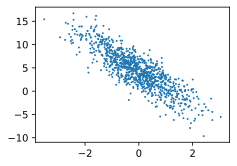

In [53]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].asnumpy(), labels.asnumpy(),1)

In [23]:
(features)

array([[-0.6757765 , -1.6640209 , -0.05585948],
       [ 1.1426826 , -0.57974076, -0.37856802],
       [ 0.26910287, -0.40820032,  0.87345815],
       ...,
       [ 1.1818129 , -0.3269007 , -0.11894365],
       [-0.15986285, -1.3345478 ,  0.02761702],
       [ 0.8377963 , -0.13352646,  2.0809221 ]])

In [32]:
w=true_w
num = 10000
X = np.random.normal(0,1,(num,len(w)))
X2 = np.dot(X,w)
X,w,X2

(array([[ 0.04111743,  0.33582854,  1.0787461 ],
        [-0.44337308,  0.22779717,  0.93875104],
        [ 1.2358226 , -0.614971  , -0.13736765],
        ...,
        [ 0.37776408, -0.08464312, -0.50133836],
        [ 1.3433056 ,  0.7185654 , -0.28644723],
        [ 0.7864526 ,  0.7644408 ,  0.05691174]]),
 array([ 2., -3.,  4.]),
 array([ 3.3897336 ,  2.1848664 ,  3.7670872 , ..., -0.995896  ,
        -0.6148739 , -0.49277017]))

In [38]:
X2 += np.random.normal(0,0.01,X2.shape)
X2.reshape((-1,1))

array([[ 3.3786924 ],
       [ 2.1865458 ],
       [ 3.7622032 ],
       ...,
       [-0.98314255],
       [-0.59876597],
       [-0.50937796]])

In [62]:
def data_iter(batch_size, features, lables):
    num = len(features)
    indices = list(range(num))
    
    random.shuffle(indices)
    for i in  range(0,num, batch_size):
        batch_indices = np.array(indices[i:min(i + batch_size, num)])
        yield features[batch_indices], labels[batch_indices]


In [63]:
batch_size = 10

for X,y  in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

[[ 0.265621   -0.87007165]
 [-0.20449746  0.26067293]
 [ 1.169923    0.2813682 ]
 [-0.3274111   0.77867067]
 [ 1.6657599   2.6870563 ]
 [-0.8881265   0.7713863 ]
 [ 1.2235837  -0.15039667]
 [ 1.3726565  -1.3675618 ]
 [ 0.2562339   0.9698456 ]
 [-2.245154    1.9350344 ]] 
 [[ 7.687667  ]
 [ 2.9006946 ]
 [ 5.5716114 ]
 [ 0.90818274]
 [-1.6082003 ]
 [-0.18422921]
 [ 7.1544957 ]
 [11.583912  ]
 [ 1.4281428 ]
 [-6.8674846 ]]


In [72]:
np.array(range(0,100,3))

array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.,
       39., 42., 45., 48., 51., 54., 57., 60., 63., 66., 69., 72., 75.,
       78., 81., 84., 87., 90., 93., 96., 99.])

In [84]:
k = (list(range(1000)))
random.shuffle(k)
k

[525,
 950,
 667,
 317,
 276,
 159,
 750,
 624,
 503,
 343,
 18,
 292,
 10,
 34,
 174,
 435,
 848,
 253,
 322,
 432,
 427,
 699,
 130,
 6,
 181,
 101,
 229,
 242,
 111,
 66,
 397,
 217,
 15,
 838,
 243,
 78,
 187,
 657,
 307,
 616,
 995,
 574,
 542,
 524,
 383,
 675,
 789,
 522,
 686,
 394,
 11,
 898,
 855,
 371,
 559,
 208,
 681,
 422,
 718,
 896,
 375,
 756,
 82,
 572,
 926,
 778,
 739,
 761,
 9,
 94,
 673,
 330,
 781,
 608,
 396,
 835,
 369,
 72,
 683,
 531,
 411,
 753,
 425,
 150,
 725,
 967,
 599,
 951,
 96,
 820,
 32,
 426,
 321,
 137,
 596,
 598,
 734,
 690,
 842,
 935,
 283,
 923,
 386,
 49,
 300,
 459,
 646,
 763,
 145,
 625,
 67,
 245,
 234,
 482,
 707,
 499,
 240,
 24,
 312,
 43,
 484,
 170,
 684,
 917,
 54,
 547,
 876,
 498,
 501,
 329,
 214,
 268,
 113,
 801,
 402,
 0,
 251,
 196,
 534,
 879,
 497,
 175,
 62,
 465,
 806,
 996,
 370,
 225,
 570,
 701,
 47,
 117,
 401,
 788,
 902,
 971,
 147,
 557,
 517,
 252,
 247,
 720,
 204,
 357,
 387,
 327,
 867,
 768,
 512,
 480,
 136,

In [ ]:
batch_indices = np.array(indices[i:min(i + batch_size, num)])